# RedBack Racing 🚗 🏁 - Regression analysis (SLR and MLR) 

By Faiyam Islam, Klaus Leung, Lynette Zhang

* This python notebook includes outputs for simple and multi linear regression. 
* Implementation also includes certain heatmaps as well as linear plots. 
* Residual plots are also utilised to understand the linear relationship between variables. 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
import statsmodels.formula.api as smf

In [2]:
import os
cwd = os.path.abspath('') 
files = os.listdir(cwd) 
cwd

'C:\\Users\\Klaus\\Desktop\\data0\\data0'

In [3]:
# Create colnames list
c = 0
c_list = []
while c <= 50:
    c_list.append(f'LapTime{c}')
    c = c + 1

# Import all lastlap columns from data
dfs_var = []
for file in files:
     if file.startswith('data0_'):
         df = pd.read_csv(f'{file}/output.csv', usecols = ['acsys.CS.LastLap'])
         dfs_var.append(df)
data_lap = pd.concat(dfs_var, axis=1)

# Renaming columns of table
data_lap.columns = c_list
data_lap

,LapTime0,LapTime1,LapTime2,LapTime3,LapTime4,LapTime5,LapTime6,LapTime7,LapTime8,LapTime9,...,LapTime41,LapTime42,LapTime43,LapTime44,LapTime45,LapTime46,LapTime47,LapTime48,LapTime49,LapTime50
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,111506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,111506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,111506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,111506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Replace 0 values with nan and find Variance of Laptimes of each set of input 
# Variance calculation by default ignores nan

data_lap1 = data_lap.replace(0, np.nan)
var_list_f = data_lap1.var()
var_list_full = var_list_f.tolist()

In [10]:
full_df = pd.read_csv('final_df.csv')

,Unnamed: 0,Unnamed: 0.1,SpeedKMH_mean,SpeedKMH_max,SpeedKMH_min,Gas_mean,Gas_max,Gas_min,Brake_mean,Brake_max,...,suspensions_REAR_STATIC_CAMBER,suspensions_REAR_SPRING_RATE,suspensions_REAR_BUMP_STOP_RATE,suspensions_REAR_PACKER_RANGE,suspensions_REAR_DAMP_BUMP,suspensions_REAR_DAMP_FAST_BUMP,suspensions_REAR_DAMP_REBOUND,suspensions_REAR_DAMP_FAST_REBOUND,tyres_FRONT_PRESSURE_STATIC,tyres_REAR_PRESSURE_STATIC
0,0,0,46.824779,84.609711,0.000000,0.719945,1.0,0.000000,0.147455,0.948782,...,-1.7086,56670.77262,104990.04453,0.10876,1198.9936,503.80323,2101.67425,1153.26332,15.86391,11.37812
1,1,1,61.355012,90.476089,39.721592,0.808638,1.0,0.000578,0.042622,0.952429,...,-1.7086,56670.77262,104990.04453,0.10876,1198.9936,503.80323,2101.67425,1153.26332,15.86391,11.37812
2,3,3,61.096449,90.427589,39.696712,0.811576,1.0,0.000431,0.044044,0.952889,...,-1.7086,56670.77262,104990.04453,0.10876,1198.9936,503.80323,2101.67425,1153.26332,15.86391,11.37812
3,5,5,60.759023,90.181877,39.782829,0.808622,1.0,0.000080,0.045326,0.945166,...,-1.7086,56670.77262,104990.04453,0.10876,1198.9936,503.80323,2101.67425,1153.26332,15.86391,11.37812
4,6,6,60.949152,89.712265,39.822598,0.809457,1.0,0.000413,0.044219,0.937211,...,-1.7086,56670.77262,104990.04453,0.10876,1198.9936,503.80323,2101.67425,1153.26332,15.86391,11.37812


In [16]:
# CREATE DATAFRAME FOR COVARIATES AGAINST MAX SPEED AND LAPTIME(Variance)

inp = {'drivetrain_DIFFERENTIAL_POWER': full_df['drivetrain_DIFFERENTIAL_POWER'][0:451:9]}
inp_used = pd.DataFrame(inp)
inp_used['brakes_DATA_MAX_TORQUE'] = full_df['brakes_DATA_MAX_TORQUE'][0:451:9]
inp_used['brakes_DATA_FRONT_SHARE'] = full_df['brakes_DATA_FRONT_SHARE'][0:451:9]
inp_used['drivetrain_DIFFERENTIAL_COAST'] = full_df['drivetrain_DIFFERENTIAL_COAST'][0:451:9]
inp_used['drivetrain_DIFFERENTIAL_PRELOAD'] = full_df['drivetrain_DIFFERENTIAL_PRELOAD'][0:451:9]
inp_used['suspensions_BASIC_WHEELBASE'] = full_df['suspensions_BASIC_WHEELBASE'][0:451:9]
inp_used['suspensions_BASIC_CG_LOCATION'] = full_df['suspensions_BASIC_CG_LOCATION'][0:451:9]
inp_used['tyres_FRONT_PRESSURE_STATIC'] = full_df['tyres_FRONT_PRESSURE_STATIC'][0:451:9]
inp_used['tyres_REAR_PRESSURE_STATIC'] = full_df['tyres_REAR_PRESSURE_STATIC'][0:451:9]
inp_used['SpeedKMH_max'] = [90.47609, 89.29832, 87.97126, 90.82478, 90.73145, 84.0836, 93.25613, 88.63668, 90.16315, 88.44083, 92.6524, 
                            92.797, 92.94788, 91.5701, 75.67801, 87.87088, 92.47924, 86.95013, 88.01711, 79.12508, 93.83981, 83.66523,
                            75.84158, 90.62859, 91.66243, 89.69738, 87.33925, 91.24706, 82.00877, 88.94535, 84.9073, 80.65592, 90.54952,
                            89.35272, 90.74039, 93.68706, 90.65046, 89.75504, 89.4193, 75.70599, 91.43632, 74.65295, 89.68648, 85.86021,
                            90.38127, 89.96516, 88.04066, 71.74622, 84.14307, 88.58717, 78.25121]
inp_used['LapTime_Var'] = var_list_full

# Reset row numbers to match input number
inp_used.index = range(51)

# Show dataframe
inp_used

,drivetrain_DIFFERENTIAL_POWER,brakes_DATA_MAX_TORQUE,brakes_DATA_FRONT_SHARE,drivetrain_DIFFERENTIAL_COAST,drivetrain_DIFFERENTIAL_PRELOAD,suspensions_BASIC_WHEELBASE,suspensions_BASIC_CG_LOCATION,tyres_FRONT_PRESSURE_STATIC,tyres_REAR_PRESSURE_STATIC,SpeedKMH_max,LapTime_Var
0,0.04899,584.97838,0.68159,0.25441,11.56795,1.64804,0.42788,15.86391,11.37812,90.47609,1.774255e+09
1,0.12730,504.22646,0.65816,0.05902,17.96249,1.78907,0.59936,18.67525,12.54306,89.29832,2.098901e+09
2,0.22576,559.25235,0.79939,0.56922,16.88803,1.71478,0.51513,17.13329,14.82224,87.97126,2.273494e+09
3,0.90209,666.49156,0.66707,0.21448,22.36049,1.89264,0.51827,11.07106,14.11274,90.82478,1.694923e+09
4,0.18483,542.52156,0.53560,0.46672,12.73195,1.55655,0.39445,15.94620,7.48544,90.73145,1.988440e+09
5,0.06359,730.29848,0.61575,0.64174,3.81777,1.72474,0.47830,19.04970,7.60754,84.08360,2.087456e+09
6,0.30576,752.08315,0.75881,0.89537,7.97927,1.55328,0.38959,15.86859,19.85950,93.25613,1.836369e+09
7,0.21256,404.58805,0.75162,0.07759,18.80768,1.58944,0.53279,16.73223,13.23161,88.63668,1.719773e+09
8,0.18804,461.67141,0.77293,0.13361,8.09777,1.60096,0.55523,8.12552,8.76294,90.16315,2.183286e+09
9,0.56608,597.18757,0.74750,0.25316,9.78658,1.89218,0.47658,9.13666,15.72955,88.44083,1.687625e+09


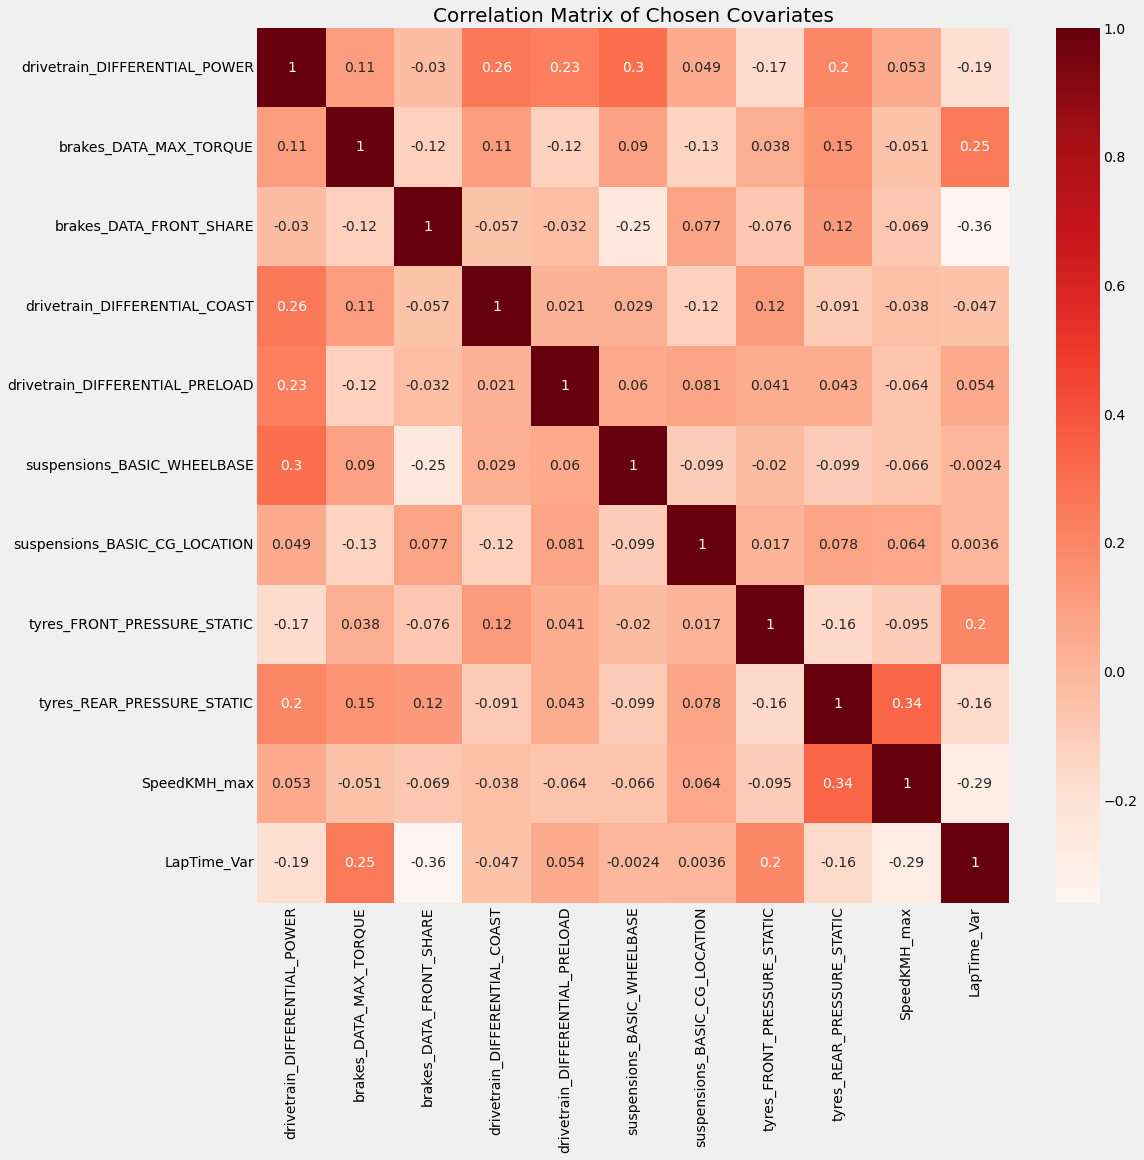

In [71]:
# Correlation matrix of chosen covariates
plt.figure(figsize=(15,15))
sns.heatmap(inp_used.corr(),cbar=True,annot=True,cmap='Reds')
plt.title("Correlation Matrix of Chosen Covariates", fontsize = 20)
plt.show()

In [17]:
# CHI-SQUARED TEST FOR INDEPENDENCE (Against max speed)

colnames = ['brakes_DATA_MAX_TORQUE','brakes_DATA_FRONT_SHARE','drivetrain_DIFFERENTIAL_POWER','drivetrain_DIFFERENTIAL_COAST','drivetrain_DIFFERENTIAL_PRELOAD','suspensions_BASIC_WHEELBASE', 'suspensions_BASIC_CG_LOCATION', 'tyres_FRONT_PRESSURE_STATIC', 'tyres_REAR_PRESSURE_STATIC']


def find_correlation_s(col_variable):
  crosstab = pd.crosstab(inp_used['SpeedKMH_max'], inp_used[col_variable])
  p_value = stats.chi2_contingency(crosstab)[1]
  if np.isnan(p_value) == False:
    print("The p-value of the Chi-square test comparing", col_variable, "with Max Speed is:", p_value)

for columns in colnames:
  find_correlation_s(columns)

data = {'Name': ['Tom', 'Joseph', 'Krish', 'John'], 'Age': [20, 21, 19, 18]} 

The p-value of the Chi-square test comparing brakes_DATA_MAX_TORQUE with Max Speed is: 0.2382758494586141
The p-value of the Chi-square test comparing brakes_DATA_FRONT_SHARE with Max Speed is: 0.23827584945861213
The p-value of the Chi-square test comparing drivetrain_DIFFERENTIAL_POWER with Max Speed is: 0.23827584945861213
The p-value of the Chi-square test comparing drivetrain_DIFFERENTIAL_COAST with Max Speed is: 0.2382758494586141
The p-value of the Chi-square test comparing drivetrain_DIFFERENTIAL_PRELOAD with Max Speed is: 0.238275849458616
The p-value of the Chi-square test comparing suspensions_BASIC_WHEELBASE with Max Speed is: 0.238275849458616
The p-value of the Chi-square test comparing suspensions_BASIC_CG_LOCATION with Max Speed is: 0.2382758494586141
The p-value of the Chi-square test comparing tyres_FRONT_PRESSURE_STATIC with Max Speed is: 0.2382758494586141
The p-value of the Chi-square test comparing tyres_REAR_PRESSURE_STATIC with Max Speed is: 0.2382758494586141


In [18]:
# CHI-SQUARED TEST FOR INDEPENDENCE (Against var of lap time)

def find_correlation_l(col_variable):
  crosstab = pd.crosstab(inp_used['LapTime_Var'], inp_used[col_variable])
  p_value = stats.chi2_contingency(crosstab)[1]
  if np.isnan(p_value) == False:
    print("The p-value of the Chi-square test comparing", col_variable, "with Variance of Lap Time is:", p_value)

for columns in colnames:
  find_correlation_l(columns)

The p-value of the Chi-square test comparing brakes_DATA_MAX_TORQUE with Variance of Lap Time is: 0.2382758494586141
The p-value of the Chi-square test comparing brakes_DATA_FRONT_SHARE with Variance of Lap Time is: 0.238275849458616
The p-value of the Chi-square test comparing drivetrain_DIFFERENTIAL_POWER with Variance of Lap Time is: 0.23827584945861213
The p-value of the Chi-square test comparing drivetrain_DIFFERENTIAL_COAST with Variance of Lap Time is: 0.23827584945861213
The p-value of the Chi-square test comparing drivetrain_DIFFERENTIAL_PRELOAD with Variance of Lap Time is: 0.238275849458616
The p-value of the Chi-square test comparing suspensions_BASIC_WHEELBASE with Variance of Lap Time is: 0.23827584945861213
The p-value of the Chi-square test comparing suspensions_BASIC_CG_LOCATION with Variance of Lap Time is: 0.2382758494586141
The p-value of the Chi-square test comparing tyres_FRONT_PRESSURE_STATIC with Variance of Lap Time is: 0.23827584945861213
The p-value of the Ch

Estimated coefficients:
b_0 = 88.94873136020244        
b_1 = -0.0025217289768023456


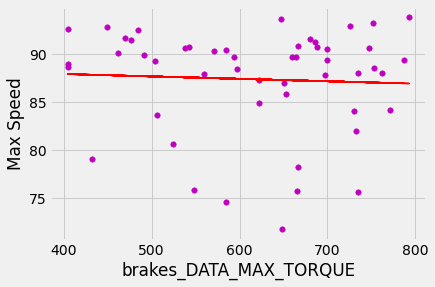

In [79]:
# SIMPLE LINEAR REGRESSION WITH COEFFICIENTS AS OUTPUT

def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return (b_0, b_1)
 
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "r", linewidth = 1.5)
 
    # putting labels
    plt.xlabel('brakes_DATA_MAX_TORQUE')
    plt.ylabel('Max Speed')
 
    # function to show plot
    plt.show()
 
# observations / data
x = inp_used['brakes_DATA_MAX_TORQUE']
y = inp_used['SpeedKMH_max']

# estimating coefficients
b = estimate_coef(x, y)
print("Estimated coefficients:\nb_0 = {}  \
      \nb_1 = {}".format(b[0], b[1]))

# plotting regression line
plot_regression_line(x, y, b)

Estimated coefficients:
b_0 = 89.9985418437677        
b_1 = -3.8430218005499506


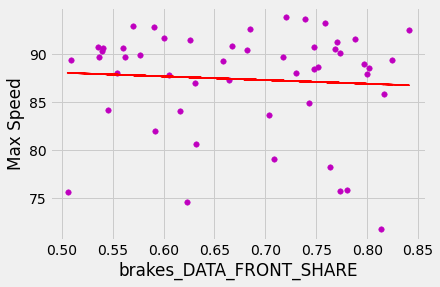

In [80]:
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "r", linewidth = 1.5)
 
    # putting labels
    plt.xlabel('brakes_DATA_FRONT_SHARE')
    plt.ylabel('Max Speed')
 
    # function to show plot
    plt.show()
 
# observations / data
x = inp_used['brakes_DATA_FRONT_SHARE']
y = inp_used['SpeedKMH_max']

# estimating coefficients
b = estimate_coef(x, y)
print("Estimated coefficients:\nb_0 = {}  \
      \nb_1 = {}".format(b[0], b[1]))

# plotting regression line
plot_regression_line(x, y, b)

Estimated coefficients:
b_0 = 86.92988097429459        
b_1 = 1.1478045211092511


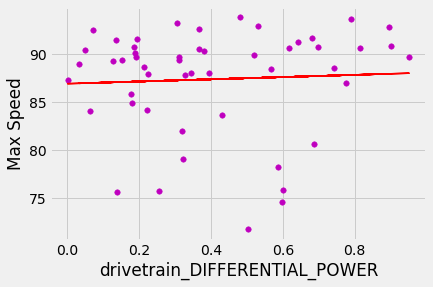

In [81]:
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "r", linewidth = 1.5)
 
    # putting labels
    plt.xlabel('drivetrain_DIFFERENTIAL_POWER')
    plt.ylabel('Max Speed')
 
    # function to show plot
    plt.show()
 
# observations / data
x = inp_used['drivetrain_DIFFERENTIAL_POWER']
y = inp_used['SpeedKMH_max']

# estimating coefficients
b = estimate_coef(x, y)
print("Estimated coefficients:\nb_0 = {}  \
      \nb_1 = {}".format(b[0], b[1]))

# plotting regression line
plot_regression_line(x, y, b)

Estimated coefficients:
b_0 = 87.77386100176567        
b_1 = -0.6970897215877571


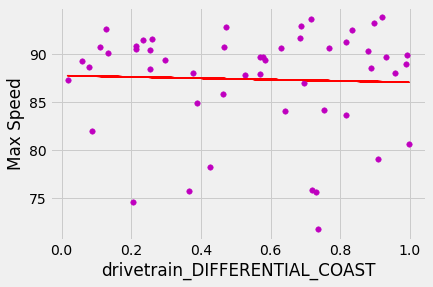

In [82]:
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "r", linewidth = 1.5)
 
    # putting labels
    plt.xlabel('drivetrain_DIFFERENTIAL_COAST')
    plt.ylabel('Max Speed')
 
    # function to show plot
    plt.show()
 
# observations / data
x = inp_used['drivetrain_DIFFERENTIAL_COAST']
y = inp_used['SpeedKMH_max']

# estimating coefficients
b = estimate_coef(x, y)
print("Estimated coefficients:\nb_0 = {}  \
      \nb_1 = {}".format(b[0], b[1]))

# plotting regression line
plot_regression_line(x, y, b)

Estimated coefficients:
b_0 = 87.97065824295002        
b_1 = -0.050886206302961215


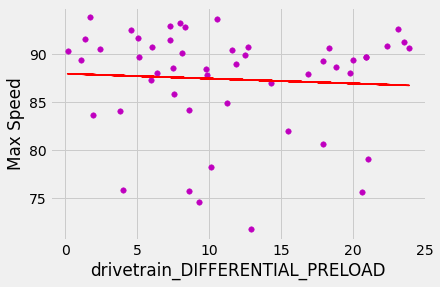

In [83]:
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "r", linewidth = 1.5)
 
    # putting labels
    plt.xlabel('drivetrain_DIFFERENTIAL_PRELOAD')
    plt.ylabel('Max Speed')
 
    # function to show plot
    plt.show()
 
# observations / data
x = inp_used['drivetrain_DIFFERENTIAL_PRELOAD']
y = inp_used['SpeedKMH_max']

# estimating coefficients
b = estimate_coef(x, y)
print("Estimated coefficients:\nb_0 = {}  \
      \nb_1 = {}".format(b[0], b[1]))

# plotting regression line
plot_regression_line(x, y, b)

Estimated coefficients:
b_0 = 92.85558566350674        
b_1 = -3.2213830932071703


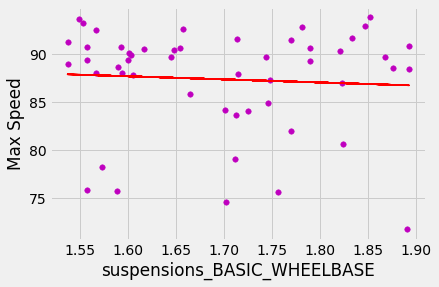

In [84]:
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "r", linewidth = 1.5)
 
    # putting labels
    plt.xlabel('suspensions_BASIC_WHEELBASE')
    plt.ylabel('Max Speed')
 
    # function to show plot
    plt.show()
 
# observations / data
x = inp_used['suspensions_BASIC_WHEELBASE']
y = inp_used['SpeedKMH_max']

# estimating coefficients
b = estimate_coef(x, y)
print("Estimated coefficients:\nb_0 = {}  \
      \nb_1 = {}".format(b[0], b[1]))

# plotting regression line
plot_regression_line(x, y, b)

Estimated coefficients:
b_0 = 85.16178545160241        
b_1 = 4.771680353061377


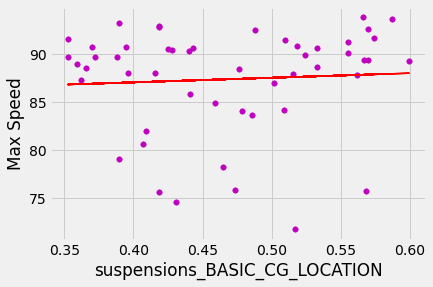

In [85]:
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "r", linewidth = 1.5)
 
    # putting labels
    plt.xlabel('suspensions_BASIC_CG_LOCATION')
    plt.ylabel('Max Speed')
 
    # function to show plot
    plt.show()
 
# observations / data
x = inp_used['suspensions_BASIC_CG_LOCATION']
y = inp_used['SpeedKMH_max']

# estimating coefficients
b = estimate_coef(x, y)
print("Estimated coefficients:\nb_0 = {}  \
      \nb_1 = {}".format(b[0], b[1]))

# plotting regression line
plot_regression_line(x, y, b)

Estimated coefficients:
b_0 = 89.09217165821566        
b_1 = -0.12678433269699838


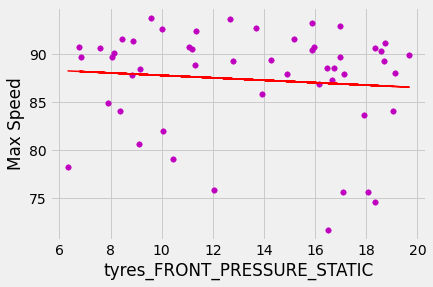

In [86]:
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "r", linewidth = 1.5)
 
    # putting labels
    plt.xlabel('tyres_FRONT_PRESSURE_STATIC')
    plt.ylabel('Max Speed')
 
    # function to show plot
    plt.show()
 
# observations / data
x = inp_used['tyres_FRONT_PRESSURE_STATIC']
y = inp_used['SpeedKMH_max']

# estimating coefficients
b = estimate_coef(x, y)
print("Estimated coefficients:\nb_0 = {}  \
      \nb_1 = {}".format(b[0], b[1]))

# plotting regression line
plot_regression_line(x, y, b)

Estimated coefficients:
b_0 = 81.35981207897832        
b_1 = 0.43791644905262633


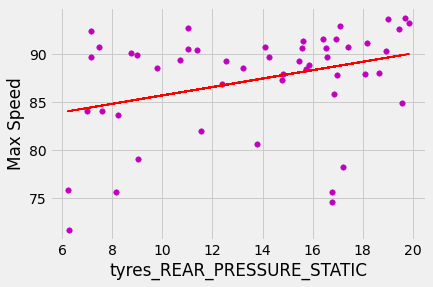

In [87]:
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "r", linewidth = 1.5)
 
    # putting labels
    plt.xlabel('tyres_REAR_PRESSURE_STATIC')
    plt.ylabel('Max Speed')
 
    # function to show plot
    plt.show()
 
# observations / data
x = inp_used['tyres_REAR_PRESSURE_STATIC']
y = inp_used['SpeedKMH_max']

# estimating coefficients
b = estimate_coef(x, y)
print("Estimated coefficients:\nb_0 = {}  \
      \nb_1 = {}".format(b[0], b[1]))

# plotting regression line
plot_regression_line(x, y, b)

Covariates are set to:
['brakes_DATA_MAX_TORQUE', 'brakes_DATA_FRONT_SHARE', 'drivetrain_DIFFERENTIAL_POWER', 'drivetrain_DIFFERENTIAL_COAST', 'drivetrain_DIFFERENTIAL_PRELOAD', 'suspensions_BASIC_WHEELBASE', 'suspensions_BASIC_CG_LOCATION', 'tyres_FRONT_PRESSURE_STATIC', 'tyres_REAR_PRESSURE_STATIC']

Coefficients:  ['-0.0062067', '-8.3362978', '0.4810203', '0.1214418', '-0.0816237', '-2.7120697', '2.5182442', '-0.0537537', '0.4684142']


                         Covariate Coefficient
0           brakes_DATA_MAX_TORQUE  -0.0062067
1          brakes_DATA_FRONT_SHARE  -8.3362978
2    drivetrain_DIFFERENTIAL_POWER   0.4810203
3    drivetrain_DIFFERENTIAL_COAST   0.1214418
4  drivetrain_DIFFERENTIAL_PRELOAD  -0.0816237
5      suspensions_BASIC_WHEELBASE  -2.7120697
6    suspensions_BASIC_CG_LOCATION   2.5182442
7      tyres_FRONT_PRESSURE_STATIC  -0.0537537
8       tyres_REAR_PRESSURE_STATIC   0.4684142


Variance score / R-squared: 0.15498569714525479

Prediction of Max Speed with Parame

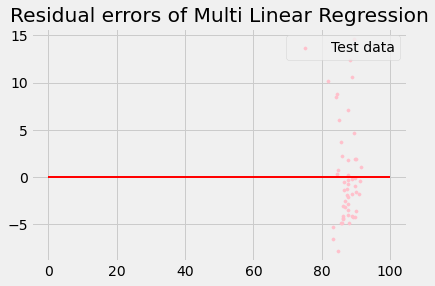

In [104]:
# MULTI LINEAR REGRESSION MODEL TO SET SEVERAL COVARIATES
# X represents numerical features
# y represents the response (Max Speed)
X = inp_used[['brakes_DATA_MAX_TORQUE','brakes_DATA_FRONT_SHARE','drivetrain_DIFFERENTIAL_POWER','drivetrain_DIFFERENTIAL_COAST','drivetrain_DIFFERENTIAL_PRELOAD','suspensions_BASIC_WHEELBASE', 'suspensions_BASIC_CG_LOCATION', 'tyres_FRONT_PRESSURE_STATIC', 'tyres_REAR_PRESSURE_STATIC']]
y = inp_used['SpeedKMH_max']


# create linear regression object
reg = linear_model.LinearRegression()
 
# Fill regression object with data
reg.fit(X, y)
 
# regression coefficients
print(f'Covariates are set to:\n{colnames}\n')
coefficient_list = []
for coef in reg.coef_:
    coefficient_list.append("{:.7f}".format(coef))
print('Coefficients: ', coefficient_list)
print('\n')

# Merge data into a df
data_speed = {'Covariate': colnames, 'Coefficient': coefficient_list}

# Create DataFrame  
sped_df = pd.DataFrame(data_speed)  
  
# Print the output.  
print(sped_df)
print('\n')
 
# variance score: 1 means perfect prediction
print('Variance score / R-squared: {}\n'.format(reg.score(X, y)))

# Can manually input prediction parameters here
pred_params = [500, 0.6, 0.8, 0.8, 20, 1.99, 0.4, 20, 40]
predicted_speed_example = reg.predict([pred_params])
print(f'Prediction of Max Speed with Parameters Set to {pred_params} is: ', predicted_speed_example)
print('\n')

pred_params_1 = [1000, 0.9, 0.1, 0.1, 40, 1.51, 0.1, 8, 8]
predicted_speed_example_1 = reg.predict([pred_params_1])
print(f'Prediction of Max Speed with Parameters Set to {pred_params_1} is: ', predicted_speed_example_1)
print('\n')

# Plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X), reg.predict(X) - y,
            color = "pink", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 100, linewidth = 2, color = "red")
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors of Multi Linear Regression")
 
## method call for showing the plot
plt.show()

Covariates are set to:
['brakes_DATA_MAX_TORQUE', 'brakes_DATA_FRONT_SHARE', 'drivetrain_DIFFERENTIAL_POWER', 'drivetrain_DIFFERENTIAL_COAST', 'drivetrain_DIFFERENTIAL_PRELOAD', 'suspensions_BASIC_WHEELBASE', 'suspensions_BASIC_CG_LOCATION', 'tyres_FRONT_PRESSURE_STATIC', 'tyres_REAR_PRESSURE_STATIC']

Coefficients:  ['1657777.557', '-2164389005.267', '-438741625.532', '-153632980.022', '11344676.627', '-405648572.420', '521036909.989', '17472079.033', '-20846719.146']


                         Covariate      Coefficient
0           brakes_DATA_MAX_TORQUE      1657777.557
1          brakes_DATA_FRONT_SHARE  -2164389005.267
2    drivetrain_DIFFERENTIAL_POWER   -438741625.532
3    drivetrain_DIFFERENTIAL_COAST   -153632980.022
4  drivetrain_DIFFERENTIAL_PRELOAD     11344676.627
5      suspensions_BASIC_WHEELBASE   -405648572.420
6    suspensions_BASIC_CG_LOCATION    521036909.989
7      tyres_FRONT_PRESSURE_STATIC     17472079.033
8       tyres_REAR_PRESSURE_STATIC    -20846719.146


Va

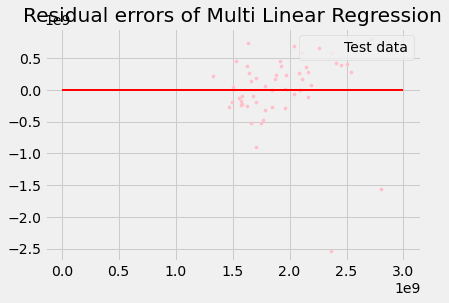

In [103]:
# MULTI LINEAR REGRESSION MODEL TO SET SEVERAL COVARIATES
# X represents numerical features
# y represents the response (Laptime variance)
X = inp_used[['brakes_DATA_MAX_TORQUE','brakes_DATA_FRONT_SHARE','drivetrain_DIFFERENTIAL_POWER','drivetrain_DIFFERENTIAL_COAST','drivetrain_DIFFERENTIAL_PRELOAD','suspensions_BASIC_WHEELBASE', 'suspensions_BASIC_CG_LOCATION', 'tyres_FRONT_PRESSURE_STATIC', 'tyres_REAR_PRESSURE_STATIC']]
y = inp_used['LapTime_Var']


# create linear regression object
reg = linear_model.LinearRegression()
 
# Fill regression object with data
reg.fit(X, y)

# regression coefficients
print(f'Covariates are set to:\n{colnames}\n')
coefficient_list = []
for coef in reg.coef_:
    coefficient_list.append("{:.3f}".format(coef))
print('Coefficients: ', coefficient_list)
print('\n')

# Merge data into a df
data_var = {'Covariate': colnames, 'Coefficient': coefficient_list}

# Create DataFrame  
var_df = pd.DataFrame(data_var)  
  
# Print the output.  
print(var_df)
print('\n')
 
# variance score: 1 means perfect prediction
print('Variance score / R-squared: {}\n'.format(reg.score(X, y)))

# Can manually input prediction parameters here
pred_params = [500, 0.6, 0.8, 0.8, 20, 1.99, 0.4, 20, 40]
pred_v = reg.predict([pred_params])
predicted_var_example = "{:.3f}".format(pred_v[0])
print(f'Prediction of LapTime Variance with Parameters Set to {pred_params} is: ', predicted_var_example)
print('\n')

pred_params_1 = [1000, 0.9, 0.1, 0.1, 40, 1.51, 0.1, 8, 8]
pred_v_1 = reg.predict([pred_params_1])
predicted_var_example_1 = "{:.3f}".format(pred_v_1[0])
print(f'Prediction of LapTime Variance with Parameters Set to {pred_params_1} is: ', predicted_var_example_1)
print('\n')

# Plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X), reg.predict(X) - y,
            color = "pink", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 3000000000, linewidth = 2, color = "red")
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors of Multi Linear Regression")
 
## method call for showing the plot
plt.show()